In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import plotly.graph_objects as go
import pandas as pd



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calculate_fitness_metrics(y_true, y_pred, num_params):
    # Residuals
    residuals = y_true - y_pred
    
    # Metrics
    r_squared = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # AIC and BIC (assuming Gaussian errors)
    n = len(y_true)
    residual_sum_of_squares = np.sum(residuals**2)
    log_likelihood = -n / 2 * (np.log(2 * np.pi * residual_sum_of_squares / n) + 1)
    aic = 2 * num_params - 2 * log_likelihood
    bic = num_params * np.log(n) - 2 * log_likelihood
    
    # Return all metrics
    return {
        "R-squared": r_squared,
        "RMSE": rmse,
        "MAE": mae,
        "AIC": aic,
        "BIC": bic
    }


# Read the CSV file
datatxt_all = pd.read_csv('primes_data120000.txt')
datatxt_all=datatxt_all[datatxt_all["Number"]% 6 == 0].iloc[80000:90000]

# Count occurrences of each number in the relevant columns
number_counts_primes_plus_one = datatxt_all['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt_all['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt_all['Twins'].value_counts().sort_index()

# Logarithmic fit function
def log_fit(x, a, b):
    return a * np.log(x) + b

# Reciprocal logarithmic fit function with constraints
def reciprocal_log_fit(x, c, d):
    return c / np.log(x) + d

# Function to fit and plot data with continuity at the threshold
"""def fit_and_plot_with_constraints(data, threshold, title):
    x_data = data.index.to_numpy()
    y_data = data.values

    # Split data into before and after threshold
    x_before = x_data[x_data <= threshold]
    y_before = y_data[:len(x_before)]
    x_after = x_data[x_data > threshold]
    y_after = y_data[len(x_before):]

    # Ensure non-empty before and after threshold
    if len(x_before) < 2 or len(x_after) < 2:
        print(f"Insufficient data for fitting {title}")
        return

    # Fit log model to the data before the threshold
    try:
        popt_before, _ = curve_fit(log_fit, x_before, y_before, maxfev=5000)
    except RuntimeError:
        print(f"Log fit failed for {title}")
        return

    # Calculate the value of the log fit at the threshold
    threshold_value = log_fit(threshold, *popt_before)

    # Fit reciprocal log model to the data after the threshold
    try:
        # Adjust the initial guess for c_initial and d_initial to ensure valid bounds
        c_initial = np.max(y_after) * np.log(np.min(x_after))  # Initial guess for c
        d_initial = np.max([1, 1 - c_initial / np.log(np.max(x_after))])  # Ensure d >= 1

        bounds_after = ([0, 1], [np.inf, np.inf])  # Ensure d >= 1

        def adjusted_reciprocal_log_fit(x, c, d):
            return c / np.log(x) + d + (threshold_value - reciprocal_log_fit(threshold, c, d))

        popt_after, _ = curve_fit(
            adjusted_reciprocal_log_fit, x_after, y_after,
            p0=[c_initial, d_initial],
            bounds=bounds_after,
            maxfev=5000
        )
    except RuntimeError:
        print(f"Reciprocal log fit failed for {title}")
        return

    # Generate fitted values
    y_fit_before = log_fit(x_before, *popt_before)
    y_fit_after = adjusted_reciprocal_log_fit(x_after, *popt_after)

    # Plot the results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name='Original Data'))
    fig.add_trace(go.Scatter(x=x_before, y=y_fit_before, mode='lines', name='Log Fit (Before Threshold)'))
    fig.add_trace(go.Scatter(x=x_after, y=y_fit_after, mode='lines', name='Reciprocal Log Fit (After Threshold)'))
    fig.add_vline(x=threshold, line=dict(color="green", dash="dash"), name="Threshold")
    fig.update_layout(
        title=title,
        xaxis_title="Number",
        yaxis_title="Count",
        legend_title="Legend"
    )
    fig.show()

    # Print the fitted parameters for reference
    print(f"Fitted Parameters for {title}:")
    print(f"Log Fit (Before Threshold): a = {popt_before[0]}, b = {popt_before[1]}")
    print(f"Reciprocal Log Fit (After Threshold): c = {popt_after[0]}, d = {popt_after[1]}")
"""
def fit_and_plot_with_constraints(data, threshold, title):
    x_data = data.index.to_numpy()
    y_data = data.values

    # Split data into before and after threshold
    x_before = x_data[x_data <= threshold]
    y_before = y_data[:len(x_before)]
    x_after = x_data[x_data > threshold]
    y_after = y_data[len(x_before):]

    # Ensure non-empty before and after threshold
    if len(x_before) < 2 or len(x_after) < 2:
        print(f"Insufficient data for fitting {title}")
        return

    # Fit log model to the data before the threshold
    try:
        popt_before, _ = curve_fit(log_fit, x_before, y_before, maxfev=5000)
    except RuntimeError:
        print(f"Log fit failed for {title}")
        return

    # Calculate the value of the log fit at the threshold
    threshold_value = log_fit(threshold, *popt_before)

    # Fit reciprocal log model to the data after the threshold
    try:
        c_initial = np.max(y_after) * np.log(np.min(x_after))  # Initial guess for c
        d_initial = np.max([1, 1 - c_initial / np.log(np.max(x_after))])  # Ensure d >= 1
        bounds_after = ([0, 1], [np.inf, np.inf])

        def adjusted_reciprocal_log_fit(x, c, d):
            return c / np.log(x) + d + (threshold_value - reciprocal_log_fit(threshold, c, d))

        popt_after, _ = curve_fit(
            adjusted_reciprocal_log_fit, x_after, y_after,
            p0=[c_initial, d_initial],
            bounds=bounds_after,
            maxfev=5000
        )
    except RuntimeError:
        print(f"Reciprocal log fit failed for {title}")
        return

    # Generate fitted values
    y_fit_before = log_fit(x_before, *popt_before)
    y_fit_after = adjusted_reciprocal_log_fit(x_after, *popt_after)

    # Plot the results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name='Original Data'))
    fig.add_trace(go.Scatter(x=x_before, y=y_fit_before, mode='lines', name='Log Fit (Before Threshold)'))
    fig.add_trace(go.Scatter(x=x_after, y=y_fit_after, mode='lines', name='Reciprocal Log Fit (After Threshold)'))
    fig.add_vline(x=threshold, line=dict(color="green", dash="dash"), name="Threshold")
    fig.update_layout(
        title=title,
        xaxis_title="Number",
        yaxis_title="Count",
        legend_title="Legend"
    )
    fig.show()

    # Calculate fitness metrics
    fitness_before = calculate_fitness_metrics(y_before, y_fit_before, len(popt_before))
    fitness_after = calculate_fitness_metrics(y_after, y_fit_after, len(popt_after))

    # Display metrics
    print(f"Fitted Parameters for {title}:")
    print(f"Log Fit (Before Threshold): a = {popt_before[0]}, b = {popt_before[1]}")
    print(f"Reciprocal Log Fit (After Threshold): c = {popt_after[0]}, d = {popt_after[1]}")
    print("\nFitness Metrics:")
    print(f"Before Threshold: {fitness_before}")
    print(f"After Threshold: {fitness_after}")

# Example application
fit_and_plot_with_constraints(number_counts_primes_plus_one, threshold=4956, title="Log and Reciprocal Log Fit for Primes +1")
fit_and_plot_with_constraints(number_counts_primes_minus_one, threshold=4956, title="Log and Reciprocal Log Fit for Primes -1")
fit_and_plot_with_constraints(number_counts_primes_twins, threshold=304, title="Log and Reciprocal Log Fit for Twins")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def calculate_threshold(x_data, y_data):
    """
    Automatically calculate the threshold by detecting a significant change
    in the slope of the data (inflection point).
    """
    # Compute the first derivative (slope)
    first_derivative = np.gradient(y_data, x_data)

    # Compute the second derivative (curvature)
    second_derivative = np.gradient(first_derivative, x_data)

    # Find where the second derivative changes sign (indicating an inflection point)
    inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]

    # Choose the first inflection point as the threshold (or adjust based on context)
    print(inflection_points[300])
    if len(inflection_points) > 5:
        threshold_index = inflection_points[3]
        threshold = x_data[threshold_index]
    else:
        threshold = x_data[len(x_data)//2]  # Default to the middle of the data if no inflection found

    return threshold

def plot_data_with_threshold(x_data, y_data, threshold):
    """
    Plot the data and the automatically detected threshold.
    """
    plt.plot(x_data, y_data, label="Data")
    plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold: {threshold}")
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Data with Automatically Detected Threshold")
    plt.show()
data=number_counts_primes_plus_one
# Example data (replace with your actual data)
x_data = data.index.to_numpy()
y_data = data.values

# Calculate threshold
threshold = calculate_threshold(x_data, y_data)

# Plot the data with the detected threshold
plot_data_with_threshold(x_data, y_data, threshold)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_data(x_data, y_data, group_size=100):
    """
    Group data into intervals and calculate the mean of each group.
    """
    # Calculate number of groups
    num_groups = len(x_data) // group_size
    
    # Create arrays to store the means
    smoothed_x = []
    smoothed_y = []
    
    for i in range(num_groups):
        # Select the current group
        group_x = x_data[i * group_size: (i + 1) * group_size]
        group_y = y_data[i * group_size: (i + 1) * group_size]
        
        # Calculate the mean of the current group
        smoothed_x.append(np.mean(group_x))
        smoothed_y.append(np.mean(group_y))
    
    return np.array(smoothed_x), np.array(smoothed_y)

def calculate_inflection_points(x_data, y_data):
    """
    Calculate the inflection points (where the second derivative changes sign).
    """
    # Compute the first and second derivatives
    first_derivative = np.gradient(y_data, x_data)
    second_derivative = np.gradient(first_derivative, x_data)
    
    # Find where the second derivative changes sign
    inflection_points = np.where(np.diff(np.sign(second_derivative)))[0]
    
    return inflection_points

def plot_data_with_inflection_points(x_data, y_data, inflection_points):
    """
    Plot the data and mark the inflection points.
    """
    plt.plot(x_data, y_data, label="Smoothed Data")
    plt.scatter(x_data[inflection_points], y_data[inflection_points], color='red', label="Inflection Points")
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Data with Inflection Points")
    plt.show()

# Example data (replace with your actual data)


# Step 1: Smooth the data by grouping into intervals of 50 points
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=100)

# Step 2: Calculate the inflection points
inflection_points = calculate_inflection_points(smoothed_x, smoothed_y)

# Step 3: Plot the data and mark the inflection points
plot_data_with_inflection_points(smoothed_x, smoothed_y, inflection_points)
print(inflection_points)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def smooth_data(x_data, y_data, group_size):
    """
    Group data into intervals and calculate the mean of each group.
    """
    # Calculate number of groups
    num_groups = len(x_data) // group_size
    
    # Create arrays to store the means
    smoothed_x = []
    smoothed_y = []
    
    for i in range(num_groups):
        # Select the current group
        group_x = x_data[i * group_size: (i + 1) * group_size]
        group_y = y_data[i * group_size: (i + 1) * group_size]
        
        # Calculate the mean of the current group
        smoothed_x.append(np.mean(group_x))
        smoothed_y.append(np.mean(group_y))
    
    return np.array(smoothed_x), np.array(smoothed_y)

def find_threshold(x_data, y_data):
    """
    Find the threshold where the first derivative becomes negative (decreasing).
    """
    # Calculate the first derivative (difference between consecutive y-values)
    first_derivative = np.diff(y_data)
    
    # Find the index where the first derivative becomes negative
    threshold_index = np.argmax(first_derivative < 0)  # First index where the derivative is negative
    
    # Return the x-value corresponding to the threshold
    threshold = x_data[threshold_index]
    return threshold

def plot_data_with_threshold(x_data, y_data, threshold):
    """
    Plot the data and mark the threshold point.
    """
    plt.plot(x_data, y_data, label="Data")
    plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold at x={threshold}")
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Data with Threshold Point")
    plt.show()

# Example data (replace with your actual data)
datatxt_all = pd.read_csv('primes_data_150000.txt')
datatxt_all=datatxt_all
divid=50
# Count occurrences of each number in the relevant columns
number_counts_primes_plus_one = datatxt_all['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt_all['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt_all['Twins'].value_counts().sort_index()
data=number_counts_primes_plus_one
x_data = data.index.to_numpy()
y_data = data.values
print("max",x_data[-1])
group_size=x_data[-1]//divid
# Step 1: Smooth the data by grouping into intervals of 50 points
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)

# Step 2: Find the threshold where the data starts to decrease
threshold = find_threshold(smoothed_x, smoothed_y)

# Step 3: Plot the data and mark the threshold
plot_data_with_threshold(smoothed_x, smoothed_y, threshold)

print(f"Calculated Threshold: {threshold}")
data=number_counts_primes_minus_one
x_data = data.index.to_numpy()
y_data = data.values
print("max2",x_data[-1])
group_size=x_data[-1]//divid
# Step 1: Smooth the data by grouping into intervals of 50 points
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)

# Step 2: Find the threshold where the data starts to decrease
threshold = find_threshold(smoothed_x, smoothed_y)

# Step 3: Plot the data and mark the threshold
plot_data_with_threshold(smoothed_x, smoothed_y, threshold)

print(f"Calculated Threshold: {threshold}")
data=number_counts_primes_twins
x_data = data.index.to_numpy()
y_data = data.values
print("max",x_data[-1])
group_size=x_data[-1]//divid
# Step 1: Smooth the data by grouping into intervals of 50 points
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)

# Step 2: Find the threshold where the data starts to decrease
threshold = find_threshold(smoothed_x, smoothed_y)
print(threshold)
# Step 3: Plot the data and mark the threshold
plot_data_with_threshold(smoothed_x, smoothed_y, np.floor(threshold))

print(f"Calculated Threshold: {np.floor(threshold)}")


In [ ]:
import pandas as pd
import plotly.graph_objects as go

def plot_twin_counts(data, step_range, step_start, mod=None):
    """
    Generate and display scatter plots for twin counts.

    Parameters:
    - data (DataFrame): The input data for plotting.
    - step_range (tuple): The range of steps for the title.
    - step_start (int): Start index for the range.
    - mod (int, optional): Modulus value for filtering. Default is None (no filtering).
    """
    if mod is not None:
        # Filter data based on the modulus
        data = data[data['Number'] % 6 == mod]

    # Count occurrences of twin numbers
    twin_counts = data['Twins'].value_counts().sort_index()

    # Create the scatter plot
    fig = go.Figure(data=[
        go.Scatter(
            x=twin_counts.index,
            y=twin_counts.values,
            mode="markers",
            line=dict(color="red")
        )
    ])

    # Customize plot layout
    title_mod = f"; 6 mod {mod}" if mod is not None else ""
    fig.update_layout(
        title=f'Occurrences of Each Number of Twins (Range: {step_range[0]}-{step_range[1]}{title_mod})',
        xaxis_title='Number',
        yaxis_title='Count',
        template='plotly_dark'  # Optional: Dark theme for better aesthetics
    )

    # Display the plot
    fig.show()

# Read the CSV file once

file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path,low_memory=False)

def fit_log_normal(data):
    from scipy.stats import lognorm, kstest
    import numpy as np
    import matplotlib.pyplot as plt

    # Fit the log-normal distribution
    shape, loc, scale = lognorm.fit(data, floc=0)
    sigma = shape
    mu = np.log(scale)

    # Goodness-of-fit test
    ks_stat, ks_pval = kstest(data, 'lognorm', args=(sigma, loc, scale))

    # Visualize
    x = np.linspace(min(data), max(data), 500)
    pdf_fitted = lognorm.pdf(x, s=sigma, loc=loc, scale=scale)
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')
    plt.plot(x, pdf_fitted, 'r-', label=f'Fitted Log-Normal ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')
    plt.xlabel('Number of Twins')
    plt.ylabel('Density')
    plt.title('Log-Normal Fit and Histogram')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print statistics
    print(f"Fitted Parameters:\n  Mu: {mu:.2f}\n  Sigma: {sigma:.2f}")
    print(f"Kolmogorov-Smirnov Test:\n  D-statistic: {ks_stat:.3f}\n  p-value: {ks_pval:.3e}")
    
    return mu, sigma, ks_stat, ks_pval

# Example data inspection

# Example data inspection
twin_counts = data_all['Twins'].value_counts().sort_index()

# Check for non-positive values
if any(twin_counts.index <= 0):
    twin_counts = twin_counts[twin_counts.index > 0]
# Call the function
fit_log_normal(twin_counts.index)

twin_counts = data_all['Twins'].value_counts().sort_index()


# Check for non-positive values

    # Create the scatter plot
fig = go.Figure(data=[
        go.Scatter(
            x=twin_counts.index,
            y=twin_counts.values,
            mode="markers",
            line=dict(color="red")
        )
    ])

    # Customize plot layout
title_mod = f"; 6 mod {mod}" if mod is not None else ""
fig.update_layout(
        title=f'Occurrences of Each Number of Twins global',
        xaxis_title='Number',
        yaxis_title='Count',
        template='plotly_dark'  # Optional: Dark theme for better aesthetics
    )

    # Display the plot
fig.show()

# Process data in chunks
for step_start in range(10000, 160000, 10000):
    # Extract a subset of the data for the current step range
    step_end = step_start + 10000
    data_chunk = data_all.iloc[step_start - 10000:step_start]

    # Plot overall twin counts for the current range
    plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start)

    # Plot twin counts for each modulus from 0 to 5
    for mod in range(6):
        plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start, mod=mod)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma, genpareto, kstest, chisquare

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Define histogram for observed data
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Range for fitting PDFs
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, label):
    pdf = distribution.pdf(x, *params)
    cdf = distribution.cdf(data, *params)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pvalue = kstest(data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(data)
    # Normalize observed frequencies to match expected frequencies
    observed_freq = hist * len(data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # AIC and BIC
    log_likelihood = np.sum(np.log(distribution.pdf(data, *params)))
    n_params = len(params)
    aic = 2 * n_params - 2 * log_likelihood
    bic = np.log(len(data)) * n_params - 2 * log_likelihood
    
    # Visualization
    plt.plot(x, pdf, label=f"{label} Fit")
    
    return {
        "label": label,
        "params": params,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue,
        "aic": aic,
        "bic": bic
    }

# Fit Weibull Distribution
weibull_params = weibull_min.fit(data)
weibull_results = evaluate_fit(weibull_min, weibull_params, "Weibull")

# Fit Gamma Distribution
gamma_params = gamma.fit(data)
gamma_results = evaluate_fit(gamma, gamma_params, "Gamma")

# Fit Generalized Pareto Distribution (GPD)
gpd_params = genpareto.fit(data)
gpd_results = evaluate_fit(genpareto, gpd_params, "Generalized Pareto")

# Plot histogram and fits
plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')
plt.xlabel('Number of Twins')
plt.ylabel('Density')
plt.title('Fits for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Compile results for comparison
results = pd.DataFrame([weibull_results, gamma_results, gpd_results])
results.set_index("label", inplace=True)
results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma, genpareto, kstest, chisquare

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Define histogram for observed data
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Range for fitting PDFs
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, label):
    pdf = distribution.pdf(x, *params)
    cdf = distribution.cdf(data, *params)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pvalue = kstest(data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(data)
    # Normalize observed frequencies to match expected frequencies
    observed_freq = hist * len(data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # AIC and BIC
    log_likelihood = np.sum(np.log(distribution.pdf(data, *params)))
    n_params = len(params)
    aic = 2 * n_params - 2 * log_likelihood
    bic = np.log(len(data)) * n_params - 2 * log_likelihood
    
    # Visualization
    plt.plot(x, pdf, label=f"{label} Fit")
    
    return {
        "label": label,
        "params": params,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue,
        "aic": aic,
        "bic": bic
    }

# Fit Weibull Distribution
weibull_params = weibull_min.fit(data)
weibull_results = evaluate_fit(weibull_min, weibull_params, "Weibull")

# Fit Gamma Distribution
gamma_params = gamma.fit(data)
gamma_results = evaluate_fit(gamma, gamma_params, "Gamma")

# Fit Generalized Pareto Distribution (GPD)
gpd_params = genpareto.fit(data)
gpd_results = evaluate_fit(genpareto, gpd_params, "Generalized Pareto")

# Plot histogram and fits
plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')
plt.xlabel('Number of Twins')
plt.ylabel('Density')
plt.title('Fits for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Compile results for comparison
results = pd.DataFrame([weibull_results, gamma_results, gpd_results])
results.set_index("label", inplace=True)
results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (
    weibull_min, expon, lognorm, genextreme, burr, fisk, norm, kstest, chisquare
)

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Define histogram for observed data
hist, bin_edges = np.histogram(data, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Range for fitting PDFs
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, label):
    pdf = distribution.pdf(x, *params)
    cdf = distribution.cdf(data, *params)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_pvalue = kstest(data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(data)
    observed_freq = hist * len(data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # AIC and BIC
    log_likelihood = np.sum(np.log(distribution.pdf(data, *params)))
    n_params = len(params)
    aic = 2 * n_params - 2 * log_likelihood
    bic = np.log(len(data)) * n_params - 2 * log_likelihood
    
    # Visualization
    plt.plot(x, pdf, label=f"{label} Fit")
    
    return {
        "label": label,
        "params": params,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue,
        "aic": aic,
        "bic": bic
    }

# Fit distributions
distributions = {
    "Weibull": weibull_min,
    "Exponential": expon,
    "Log-Normal": lognorm,
    "Frechet": genextreme,
    "Log-Logistic": fisk,
    "Burr": burr,
}

results = []
plt.figure(figsize=(12, 8))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Data Histogram')

for label, distribution in distributions.items():
    params = distribution.fit(data)
    fit_results = evaluate_fit(distribution, params, label)
    results.append(fit_results)

# Display the best-fit model
plt.xlabel('Number of Twins')
plt.ylabel('Density')
plt.title('Fits for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Compile results for comparison
results_df = pd.DataFrame(results)
results_df.set_index("label", inplace=True)
results_df.sort_values(by="aic", inplace=True)
print(results_df)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import kstest, chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma, genpareto, lognorm, burr, fisk,  invweibull, expon

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Split data into train/test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Range for evaluating the fit
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, test_data, label):
    # Evaluate PDF on test data
    pdf_test = distribution.pdf(test_data, *params)
    
    # Residuals: Difference between actual and predicted values
    residuals = test_data - pdf_test
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, pdf_test)
    
    # Kolmogorov-Smirnov Test on the test data
    ks_stat, ks_pvalue = kstest(test_data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test on the test data
    hist, bin_edges = np.histogram(test_data, bins=30, density=True)
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(test_data)
    observed_freq = hist * len(test_data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Visualize prediction accuracy with histogram
    plt.plot(x, distribution.pdf(x, *params), label=f"{label} PDF")
    
    return {
        "label": label,
        "params": params,
        "mse": mse,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue
    }

# Fit all distributions on the training data
distributions = {
    "Log-Logistic": fisk,
    "Weibull": weibull_min,
    "Exponential": expon,
    "Burr": burr,
    "Frechet": invweibull,
    "Log-Normal": lognorm
}

# Store results
validation_results = []

for label, dist in distributions.items():
    # Fit the distribution to the training data
    dist_params = dist.fit(train_data)
    
    # Evaluate the model on test data
    validation_results.append(evaluate_fit(dist, dist_params, test_data, label))

# Display results
validation_df = pd.DataFrame(validation_results)
validation_df.set_index("label", inplace=True)

# Print validation results
print(validation_df)
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Model Fitness Validation for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

def smooth_data(x_data, y_data, group_size):
    """
    Group data into intervals and calculate the mean of each group.
    """
    # Calculate number of groups
    num_groups = len(x_data) // group_size
    
    # Create arrays to store the means
    smoothed_x = []
    smoothed_y = []
    
    for i in range(num_groups):
        # Select the current group
        group_x = x_data[i * group_size: (i + 1) * group_size]
        group_y = y_data[i * group_size: (i + 1) * group_size]
        
        # Calculate the mean of the current group
        smoothed_x.append(np.mean(group_x))
        smoothed_y.append(np.mean(group_y))
    
    return np.array(smoothed_x), np.array(smoothed_y)


def plot_data_with_threshold(x_data, y_data):
    """
    Plot the data and mark the threshold point.
    """
    plt.plot(x_data, y_data, label="Data")
    #plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold at x={threshold}")
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Data with Threshold Point")
    plt.show()

# Example data (replace with your actual data)
datatxt_all = pd.read_csv('primes_data_150000.txt')
datatxt_all=datatxt_all
divid=50


def plot_twin_counts(data, step_range, step_start, mod=None):
    """
    Generate and display scatter plots for twin counts.

    Parameters:
    - data (DataFrame): The input data for plotting.
    - step_range (tuple): The range of steps for the title.
    - step_start (int): Start index for the range.
    - mod (int, optional): Modulus value for filtering. Default is None (no filtering).
    """
    if mod is not None:
        # Filter data based on the modulus
        data = data[data['Number'] % 6 == mod]

    # Count occurrences of twin numbers
    twin_counts = data['Twins'].value_counts().sort_index()
    group_size=step_start//4000
    x_data = twin_counts.index.to_numpy()
    y_data = twin_counts.values
    smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)
    # Create the scatter plot
    fig = go.Figure(data=[
        go.Scatter(
            x=smoothed_x,
            y=smoothed_y,
            mode="markers",
            line=dict(color="red")
        )
    ])

    # Customize plot layout
    title_mod = f"; 6 mod {mod}" if mod is not None else ""
    fig.update_layout(
        title=f'Occurrences of Each Number of Twins (Range: {step_range[0]}-{step_range[1]}{title_mod})',
        xaxis_title='Number',
        yaxis_title='Count',
        template='plotly_dark'  # Optional: Dark theme for better aesthetics
    )

    # Display the plot
    fig.show()

# Read the CSV file once
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path)

# Process data in chunks
for step_start in range(10000, 160000, 10000):
    # Extract a subset of the data for the current step range
    step_end = step_start + 10000
    data_chunk = data_all.iloc[step_start - 10000:step_start]
    

    # Plot overall twin counts for the current range
    plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start)

    # Plot twin counts for each modulus from 0 to 5
    for mod in range(6):
        plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start, mod=mod)
# Count occurrences of each number in the relevant columns
number_counts_primes_plus_one = datatxt_all['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt_all['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt_all['Twins'].value_counts().sort_index()
data=number_counts_primes_plus_one
x_data = data.index.to_numpy()
y_data = data.values
print("max",x_data[-1])
group_size=x_data[-1]//divid
# Step 1: Smooth the data by grouping into intervals of 50 points
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import lognorm, weibull_min, expon, kstest, chisquare

def smooth_data(x_data, y_data, group_size):
    """
    Group data into intervals and calculate the mean of each group.
    """
    # Calculate number of groups
    num_groups = len(x_data) // group_size
    
    # Create arrays to store the means
    smoothed_x = []
    smoothed_y = []
    
    for i in range(num_groups):
        # Select the current group
        group_x = x_data[i * group_size: (i + 1) * group_size]
        group_y = y_data[i * group_size: (i + 1) * group_size]
        
        # Calculate the mean of the current group
        smoothed_x.append(np.mean(group_x))
        smoothed_y.append(np.mean(group_y))
    
    return np.array(smoothed_x), np.array(smoothed_y)


def plot_data_with_threshold(x_data, y_data):
    """
    Plot the data and mark the threshold point.
    """
    plt.plot(x_data, y_data, label="Data")
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Data with Threshold Point")
    plt.show()


def plot_twin_counts(data, step_range, step_start, mod=None):
    """
    Generate and display scatter plots for twin counts.

    Parameters:
    - data (DataFrame): The input data for plotting.
    - step_range (tuple): The range of steps for the title.
    - step_start (int): Start index for the range.
    - mod (int, optional): Modulus value for filtering. Default is None (no filtering).
    """
    if mod is not None:
        # Filter data based on the modulus
        data = data[data['Number'] % 6 == mod]

    # Count occurrences of twin numbers
    twin_counts = data['Twins'].value_counts().sort_index()
    group_size = step_start // 4000
    x_data = twin_counts.index.to_numpy()
    y_data = twin_counts.values
    smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)

    # Fit the data to the distributions (Log-Logistic, Weibull, and Exponential)
    # Example parameters for each distribution, adjust based on your needs
    params_loglogistic = (1.866, -16.775, 473.45)
    params_weibull = (1.103, -0.00955, 700.1)
    params_exponential = (0.0, 675.91)

    # Generate the PDF for each distribution
    def loglogistic_pdf(x, a, b, c):
        return (a * b * x**(a-1)) / (1 + (x/c)**a)**(b + 1)

    def weibull_pdf(x, c, scale, shape):
        return weibull_min.pdf(x, shape, scale=scale)

    def exponential_pdf(x, loc, scale):
        return expon.pdf(x, loc=loc, scale=scale)

    x_vals = np.linspace(min(x_data), max(x_data), 1000)
    loglogistic_vals = loglogistic_pdf(x_vals, *params_loglogistic)
    weibull_vals = weibull_pdf(x_vals, *params_weibull)
    exponential_vals = exponential_pdf(x_vals, *params_exponential)

    # Create the scatter plot
    fig = go.Figure(data=[
        go.Scatter(
            x=smoothed_x,
            y=smoothed_y,
            mode="markers",
            name="Smoothed Data",
            marker=dict(color="red")
        ),
        go.Scatter(
            x=x_vals,
            y=loglogistic_vals,
            mode="lines",
            name="Log-Logistic PDF",
            line=dict(color="blue")
        ),
        go.Scatter(
            x=x_vals,
            y=weibull_vals,
            mode="lines",
            name="Weibull PDF",
            line=dict(color="green")
        ),
        go.Scatter(
            x=x_vals,
            y=exponential_vals,
            mode="lines",
            name="Exponential PDF",
            line=dict(color="purple")
        )
    ])

    # Customize plot layout
    title_mod = f"; 6 mod {mod}" if mod is not None else ""
    fig.update_layout(
        title=f'Occurrences of Each Number of Twins (Range: {step_range[0]}-{step_range[1]}{title_mod})',
        xaxis_title='Number',
        yaxis_title='Count',
        template='plotly_dark'  # Optional: Dark theme for better aesthetics
    )

    # Display the plot
    fig.show()

# Read the CSV file once
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path)

# Process data in chunks
for step_start in range(10000, 160000, 10000):
    step_end = step_start + 10000
    data_chunk = data_all.iloc[step_start - 10000:step_start]
    
    # Plot overall twin counts for the current range
    plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start)

    # Plot twin counts for each modulus from 0 to 5
    for mod in range(6):
        plot_twin_counts(data_chunk, step_range=(step_start - 10000, step_start), step_start=step_start, mod=mod)

# Count occurrences of each number in the relevant columns
number_counts_primes_plus_one = data_all['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = data_all['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = data_all['Twins'].value_counts().sort_index()

data = number_counts_primes_plus_one
x_data = data.index.to_numpy()
y_data = data.values

group_size = x_data[-1] // 50  # For example, dividing into 50 groups
smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)


/home/maher/programming/unusual_patterns/primes/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6911: RuntimeWarning:

divide by zero encountered in log



                                                         params           mse  \
label                                                                           
Log-Logistic  (1.866266984428616, -16.774641531640412, 473.4...  9.050702e+05   
Weibull       (1.1029730637713109, -0.009545175748504737, 70...  9.050702e+05   
Exponential                            (0.0, 675.9064218807293)  9.050703e+05   
Burr          (0.36258375499191664, 2.6391889709189567, -4.2...  9.050706e+05   
Frechet       (0.25950250299003047, -0.00319686510683263, 2....  9.050707e+05   
Log-Normal    (5.725996569880069, -3.5327014922331734e-15, 0...  1.459729e+08   

               ks_stat      ks_pvalue    chi_stat     chi_pvalue  
label                                                             
Log-Logistic  0.018148   5.169907e-09    2.554609   1.000000e+00  
Weibull       0.047267   1.097833e-58    6.915344   9.999922e-01  
Exponential   0.066550  5.763273e-116    7.076919   9.999898e-01  
Burr          0.

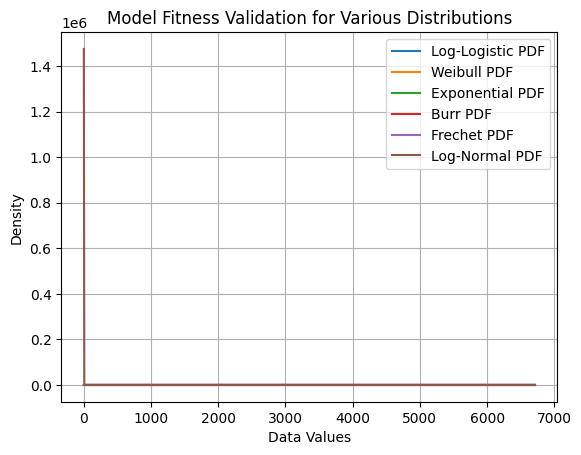

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import kstest, chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma, genpareto, lognorm, burr, fisk, invweibull, expon

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Split data into train/test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Range for evaluating the fit
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, test_data, label):
    # Evaluate PDF on test data
    pdf_test = distribution.pdf(test_data, *params)
    
    # Residuals: Difference between actual and predicted values
    residuals = test_data - pdf_test
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, pdf_test)
    
    # Kolmogorov-Smirnov Test on the test data
    ks_stat, ks_pvalue = kstest(test_data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test on the test data
    hist, bin_edges = np.histogram(test_data, bins=30, density=True)
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(test_data)
    observed_freq = hist * len(test_data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Visualize prediction accuracy with histogram
    plt.plot(x, distribution.pdf(x, *params), label=f"{label} PDF")
    
    return {
        "label": label,
        "params": params,
        "mse": mse,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue
    }

# Fit all distributions on the training data
distributions = {
    "Log-Logistic": fisk,
    "Weibull": weibull_min,
    "Exponential": expon,
    "Burr": burr,
    "Frechet": invweibull,
    "Log-Normal": lognorm
}

# Store results
validation_results = []

for label, dist in distributions.items():
    # Fit the distribution to the training data
    dist_params = dist.fit(train_data)
    
    # Evaluate the model on test data
    validation_results.append(evaluate_fit(dist, dist_params, test_data, label))

# Display results
validation_df = pd.DataFrame(validation_results)
validation_df.set_index("label", inplace=True)

# Print validation results
print(validation_df)

# Show model fit visualizations
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Model Fitness Validation for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()


/home/maher/programming/unusual_patterns/primes/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6911: RuntimeWarning:

divide by zero encountered in log



                                                         params           mse  \
label                                                                           
Log-Logistic  (1.866266984428616, -16.774641531640412, 473.4...  9.050702e+05   
Weibull       (1.1029730637713109, -0.009545175748504737, 70...  9.050702e+05   
Exponential                            (0.0, 675.9064218807293)  9.050703e+05   
Burr          (0.36258375499191664, 2.6391889709189567, -4.2...  9.050706e+05   
Frechet       (0.25950250299003047, -0.00319686510683263, 2....  9.050707e+05   
Log-Normal    (5.725996569880069, -3.5327014922331734e-15, 0...  1.459729e+08   

               ks_stat      ks_pvalue    chi_stat     chi_pvalue  
label                                                             
Log-Logistic  0.018148   5.169907e-09    2.554609   1.000000e+00  
Weibull       0.047267   1.097833e-58    6.915344   9.999922e-01  
Exponential   0.066550  5.763273e-116    7.076919   9.999898e-01  
Burr          0.

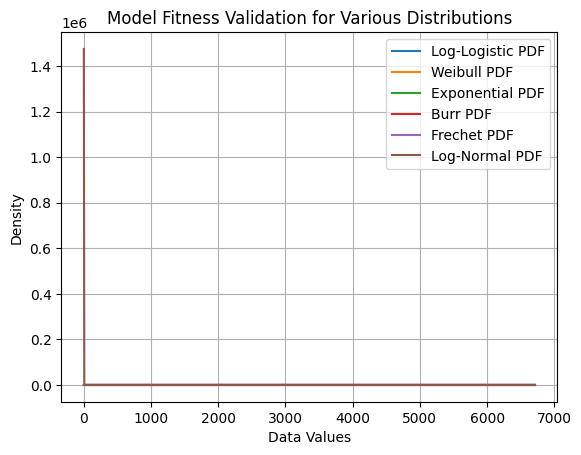

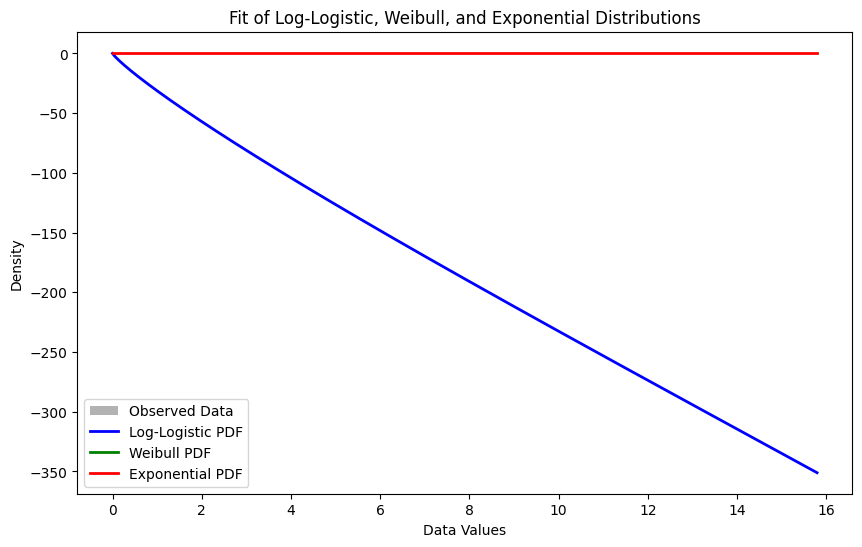

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1.4901161193847656e-08, but the percent differences are:
23.755860013894615

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, lognorm, expon, fisk, burr, invweibull, kstest, chisquare
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data (assuming 'Twins' column contains the data to analyze)
file_path = 'primes_data_150000.txt'
data_all = pd.read_csv(file_path, low_memory=False)
data = data_all['Twins'].values

# Split data into train/test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Range for evaluating the fit
x = np.linspace(min(data), max(data), 1000)

# Function to evaluate models
def evaluate_fit(distribution, params, test_data, label):
    # Evaluate PDF on test data
    pdf_test = distribution.pdf(test_data, *params)
    
    # Residuals: Difference between actual and predicted values
    residuals = test_data - pdf_test
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, pdf_test)
    
    # Kolmogorov-Smirnov Test on the test data
    ks_stat, ks_pvalue = kstest(test_data, distribution.cdf, args=params)
    
    # Chi-Square Goodness-of-Fit Test on the test data
    hist, bin_edges = np.histogram(test_data, bins=30, density=True)
    expected_freq = distribution.cdf(bin_edges[1:], *params) - distribution.cdf(bin_edges[:-1], *params)
    expected_freq *= len(test_data)
    observed_freq = hist * len(test_data)
    scale_factor = observed_freq.sum() / expected_freq.sum()
    expected_freq *= scale_factor
    chi_stat, chi_pvalue = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Visualize prediction accuracy with histogram
    plt.plot(x, distribution.pdf(x, *params), label=f"{label} PDF")
    
    return {
        "label": label,
        "params": params,
        "mse": mse,
        "ks_stat": ks_stat,
        "ks_pvalue": ks_pvalue,
        "chi_stat": chi_stat,
        "chi_pvalue": chi_pvalue
    }

# Fit all distributions on the training data
distributions = {
    "Log-Logistic": fisk,
    "Weibull": weibull_min,
    "Exponential": expon,
    "Burr": burr,
    "Frechet": invweibull,
    "Log-Normal": lognorm
}

# Store results
validation_results = []

for label, dist in distributions.items():
    # Fit the distribution to the training data
    dist_params = dist.fit(train_data)
    
    # Evaluate the model on test data
    validation_results.append(evaluate_fit(dist, dist_params, test_data, label))

# Display results
validation_df = pd.DataFrame(validation_results)
validation_df.set_index("label", inplace=True)

# Print validation results
print(validation_df)

# Show model fit visualizations
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Model Fitness Validation for Various Distributions')
plt.legend()
plt.grid(True)
plt.show()

# Sample data generation (Log-Normal) for visual comparison with fitted distributions
np.random.seed(0)
data_sample = np.random.lognormal(0, 1, 1000)

# Define the parameters for the distributions (already fitted)
params_loglogistic = (1.866, -16.775, 473.45)
params_weibull = (1.103, -0.00955, 700.1)
params_exponential = (0.0, 675.91)

# Define the PDF functions for each distribution
def loglogistic_pdf(x, a, b, c):
    return (a * b * x**(a-1)) / (1 + (x/c)**a)**(b + 1)

def weibull_pdf(x, c, scale, shape):
    return weibull_min.pdf(x, shape, scale=scale)

def exponential_pdf(x, loc, scale):
    return expon.pdf(x, loc=loc, scale=scale)

# Generate values for the x-axis (range of values)
x_vals = np.linspace(0, max(data_sample), 1000)

# Compute PDFs for each distribution
loglogistic_vals = loglogistic_pdf(x_vals, *params_loglogistic)
weibull_vals = weibull_pdf(x_vals, *params_weibull)
exponential_vals = exponential_pdf(x_vals, *params_exponential)

# Plot the histograms and the PDFs
plt.figure(figsize=(10, 6))
plt.hist(data_sample, bins=30, density=True, alpha=0.6, color='gray', label='Observed Data')

# Plot the distributions
plt.plot(x_vals, loglogistic_vals, label="Log-Logistic PDF", color='blue', lw=2)
plt.plot(x_vals, weibull_vals, label="Weibull PDF", color='green', lw=2)
plt.plot(x_vals, exponential_vals, label="Exponential PDF", color='red', lw=2)

# Adding labels and title
plt.title('Fit of Log-Logistic, Weibull, and Exponential Distributions')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()

plt.show()

# Fitness Validation: Kolmogorov-Smirnov Test and Chi-Square Test
def ks_test_distribution(dist, data, *params):
    return kstest(data, dist.cdf, args=params)

def chi_square_test(dist, data, *params):
    expected_freq = dist.pdf(np.linspace(min(data), max(data), len(data)), *params)
    observed_freq, _ = np.histogram(data, bins=30, density=True)
    return chisquare(observed_freq, expected_freq[:len(observed_freq)])

# Perform KS Test and Chi-Square Test for each distribution
ks_loglogistic = ks_test_distribution(lognorm, data_sample, *params_loglogistic)
ks_weibull = ks_test_distribution(weibull_min, data_sample, *params_weibull)
ks_exponential = ks_test_distribution(expon, data_sample, *params_exponential)

chi_loglogistic = chi_square_test(lognorm, data_sample, *params_loglogistic)
chi_weibull = chi_square_test(weibull_min, data_sample, *params_weibull)
chi_exponential = chi_square_test(expon, data_sample, *params_exponential)

# Output fitness validation results
print("KS Test Results:")
print("Log-Logistic:", ks_loglogistic)
print("Weibull:", ks_weibull)
print("Exponential:", ks_exponential)

print("\nChi-Square Test Results:")
print("Log-Logistic:", chi_loglogistic)
print("Weibull:", chi_weibull)
print("Exponential:", chi_exponential)
